# Building the Hamiltonian for large systems
We now can try to describe a concrete example. Before doing this we need to be able to build Hamiltonians  and learn how to diagonalize it 
Fist build a $N\times  N$ Hermitian matrix. (E.g. set N=2)

In [7]:
import numpy as np
N=2
M=np.random.rand(2**N,2**N)+1j*np.random.rand(2**N,2**N)
M = M + M.T.conj()

np.max(M-M.T.conj())

0j

## Eigenvectors
Now you can diagonalize it, and extract eigenvectors and eigenvalues, check that you can get back the original matrix 
$M = U m U^{\dagger}$

and that 
$M\vec{u}_1 = m_1 \vec{u}_1$


In [8]:
import scipy.linalg as LA
eig_M, U_M =LA.eigh(M)
print(eig_M)

first_eig = U_M[:,0].T.conj()@M@U_M[:,0]
print(first_eig)

[-1.4185343   0.39729801  0.93211435  4.59270854]
(-1.4185343048029537+8.326672684688674e-17j)


## Local Hamiltonian
Now we can study our first many body system, the Ising model in transverse field for  N=3
  spins, the Hamiltonian reads  H=−σ1x⊗σ2x−σ2x⊗σ3x−σ3x⊗σ1x+λ(σ1z+σ2z+σ3z)
 , build it for several values of  λ
  (e.g. 20 points in the interval  [0,10]
 ) and plot the ground state energy for every value.

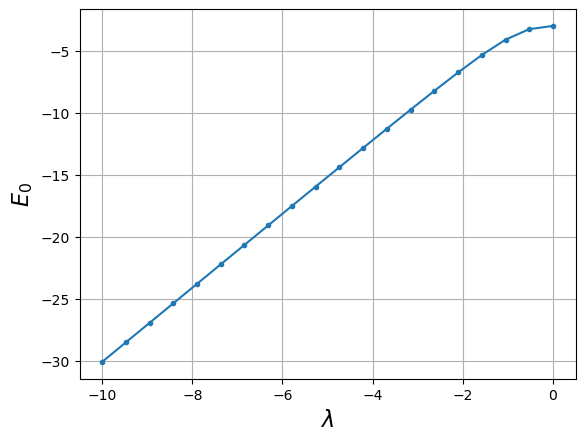

In [9]:
import matplotlib.pyplot as plt
N=3
identity = np.eye(2)
sigma_x = np.array([[0.,1.],[1.,0.]])
sigma_z = np.array([[1.,0.],[0.,-1.]])

gs_energy =[]
for v_lambda in np.linspace(-10,0,20):
    H = -np.kron(sigma_x,sigma_x) + v_lambda*(np.kron(identity,sigma_z)+  np.kron(sigma_z,identity))

    H = np.kron(H,np.eye(2)) + np.kron(np.eye(2**(N-2)),-np.kron(sigma_x,sigma_x)) + (
        v_lambda*(np.kron(np.eye(2**(N-1)),sigma_z)))
                                                                                                                                                  
    H = H -np.kron(sigma_x, np.kron(np.eye(2**(N-2)),sigma_x))
    eig_H,_ =LA.eigh(H)
    gs_energy.append(eig_H[0])  
    
plt.plot(np.linspace(-10,0,20),gs_energy,'.-')
plt.xlabel('$\lambda$',fontsize =16)
plt.ylabel('$E_0$', fontsize=16)
plt.grid('on')

## Increasing the size
We now move to the generic $N$ we do it recursively notice that going from $N$ to $N+1$ you need to perform a simple step
We wrap the above code into the function by using the 

def function():
return 

statements, we want to provide, $N$ and $\lambda$ as arguments and obtain the energies, the eigenvectors and the Hamiltonian as a result of our function evaluation


In [1]:
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
def build_and_diagonalize_H(N,v_lambda):
    identity = np.eye(2)
    sigma_x = np.array([[0.,1.],[1.,0.]])
    sigma_z = np.array([[1.,0.],[0.,-1.]])
    H = -np.kron(sigma_x,sigma_x) + v_lambda*(np.kron(identity,sigma_z)+  np.kron(sigma_z,identity))
    for n in range(3,N+1):
        H = np.kron(H,np.eye(2)) + np.kron(np.eye(2**(n-2)),-np.kron(sigma_x,sigma_x)) + (
        v_lambda*(np.kron(np.eye(2**(n-1)),sigma_z)))
                                                                                                                                                  
    H = H -np.kron(sigma_x, np.kron(np.eye(2**(N-2)),sigma_x))
    eig_H,U_H =LA.eigh(H)
    return H, eig_H, U_H


Now in the following we use the function just defined to see the first 10 energy levels of the spectrum for several values of the field for fixed $N=10$

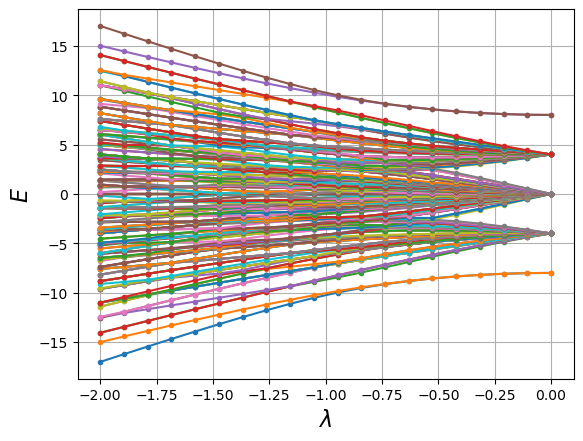

In [2]:
energies =[]
for v_lambda in np.linspace(-2,0,20):
    _,eig_H,_ =build_and_diagonalize_H(8,v_lambda)
    energies.append(eig_H)

plt.plot(np.linspace(-2,0,20),energies,'.-')
plt.xlabel('$\lambda$',fontsize =16)
plt.ylabel('$E$', fontsize=16)
plt.grid('on')

## Entanglement

We now focus on the entanglement of a bipartition of the system in two halves, for that we need to get the spectrum of $$\rho_A = tr_B|\psi\rangle \langle \psi |_{AB}$$
and its spectrum.

Equivalently remebering the relation between eigenvalue and singular value one can construc the spectrum of the singular value obtained by reshaping the vector to a matrix made by the legs in $A$ vs the legs in $B$

Since $A$ and $B$ are half of the system, it means that we want to reshape a vector of size $2^N$ into a matrix of size 
$2^N/2 \times 2^N/2$. That is the matrix we want the svd of. 

Finally the eigenvector of $\rho$, $\lambda_i = s_i^2$ with $s_i$ one of the svds. 


Finally the entanglement entropy is computed by 
$$S= -\sum_i\left( \lambda_i \log(\lambda_i)\right)$$

You should compute it for different system sizes $N$ and produce a plot of $S$ vs $N$. 

How does it look like as a function of $N$? 

Can you compare it with the one for random states seen in class?


Rember that the Hamiltonian $H$ depends on a parameter, check different values of the parameter, does the entropy change?

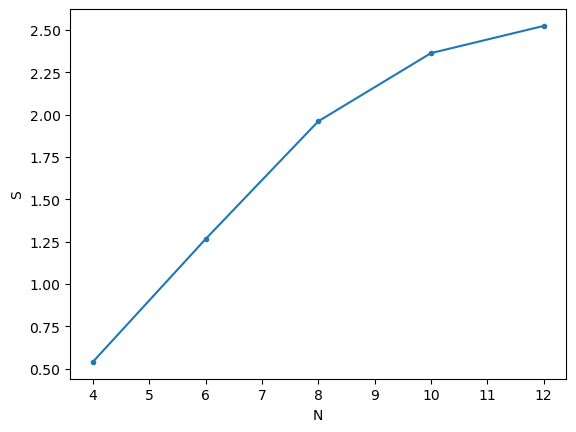

In [6]:
ent_entropies =[]
dtol=1.e-12
for N in range(4,14,2):
    _,_,U_H = build_and_diagonalize_H(N,0.1)
    g_state=(U_H[0,:])
    
    sqrt_reduced_density_matrix = np.reshape(g_state,[int(2**(N/2)),int(2**(N/2))])
    _, ent_spectrum,_= LA.svd(sqrt_reduced_density_matrix)
        #print(np.sum(ent_spectrum**2))
    chitemp = np.sum(ent_spectrum > dtol);
    ent_entropy = -np.dot(np.log(ent_spectrum[:chitemp]**2),ent_spectrum[:chitemp]**2)/np.log(2)
    ent_entropies.append(ent_entropy)
    
plt.plot(range(4,14,2),ent_entropies,'.-')
plt.xlabel('N');
plt.ylabel('S');
    